In [3]:
# !pip install numpy pandas seaborn matplotlib scikit-learn
!pip install -r requirements.txt

In [2]:
# !pip install Flask

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import os
from datetime import datetime
from flask import Flask, request, jsonify

In [4]:
df = pd.read_csv('Earthquake-Intensity-dataset.csv')
# ลบคอลัมน์ 'date' ถ้ามีใน DataFrame df
if 'date' in df.columns:
    df = df.drop(columns=['date'])


In [5]:
df

,Magnitude,Depth,destruction,Victim's reaction,Intensity
0,7.1,40.0,6,7,8
1,7.7,23.5,6,7,8
2,7.7,196.0,4,5,6
3,6.9,15.0,3,4,5
4,6.9,51.6,4,5,6
...,...,...,...,...,...
9995,6.7,15.0,7,8,9
9996,6.5,16.7,5,6,7
9997,7.8,60.0,6,7,8
9998,5.0,28.0,0,1,2


In [6]:
train_size = 0.7
num = int(len(df) * train_size)

train_data = df.sample(n=num, random_state=42)

train_data.to_csv("train_data.csv", index=False)

In [7]:
train_data

,Magnitude,Depth,destruction,Victim's reaction,Intensity
6252,6.9,93.000,4,5,6
4684,7.0,73.000,5,6,7
1731,6.9,205.681,3,4,5
4742,5.7,10.000,5,6,7
4521,5.5,10.000,6,7,8
...,...,...,...,...,...
1638,6.5,33.000,5,6,7
5891,6.9,25.000,2,3,4
7427,6.4,13.000,7,8,9
608,7.3,10.000,6,7,8


In [8]:
test_size = 0.3
num = int(len(df) * test_size)

test_data = df.drop(train_data.index).sample(n=num, random_state=42)

test_data.to_csv("test_data.csv", index=False)

In [9]:
test_data

,Magnitude,Depth,destruction,Victim's reaction,Intensity
9306,6.7,17.0,4,5,6
1796,6.7,33.0,4,5,6
6783,6.9,145.0,3,4,5
4599,7.6,50.0,4,5,6
6573,7.1,125.6,5,6,7
...,...,...,...,...,...
5750,8.2,47.4,7,8,9
6609,5.6,15.0,6,7,8
4388,6.8,26.0,5,6,7
7294,7.9,40.0,6,7,8


In [10]:
# ฟีเจอร์
X_train = train_data[['Magnitude', 'Depth', "Victim's reaction"]]
X_test = test_data[['Magnitude', 'Depth', "Victim's reaction"]]

# เป้าหมาย
Y_train_intensity = train_data['Intensity']
Y_train_destruction = train_data['destruction']
Y_test_intensity = test_data['Intensity']
Y_test_destruction = test_data['destruction']

In [11]:
print(train_data.columns)


Index(['Magnitude', 'Depth', 'destruction', 'Victim's reaction', 'Intensity'], dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler

# สร้างตัวแปร X_train และ X_test ตามที่คุณกำหนด
X_train = train_data[['Magnitude', 'Depth', "Victim's reaction"]]
X_test = test_data[['Magnitude', 'Depth', "Victim's reaction"]]

# สเกลข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit และ transform ข้อมูลฝึก
X_test_scaled = scaler.transform(X_test)        # Transform ข้อมูลทดสอบ

In [13]:
# สมมุติว่าเราจะทำนาย 'Intensity' โดยใช้ X_train_scaled
Y_train_intensity = train_data['Intensity']

# สร้างโมเดล KNN
knn = KNeighborsClassifier(n_neighbors=5)

# ฝึกโมเดล
knn.fit(X_train_scaled, Y_train_intensity)

KNeighborsClassifier()

In [14]:
# สำหรับ Destruction
Y_train_destruction = train_data['destruction']

# สร้างโมเดล KNN
knn_destruction = KNeighborsClassifier(n_neighbors=5)

# ฝึกโมเดล
knn_destruction.fit(X_train_scaled, Y_train_destruction)


KNeighborsClassifier()

In [15]:
# ทำนายผลลัพธ์ในชุดทดสอบ
y_pred = knn.predict(X_test_scaled)

# ใช้ Y_test_intensity หรือ Y_test_destruction ขึ้นอยู่กับโมเดลที่คุณใช้
accuracy = accuracy_score(Y_test_intensity, y_pred)

print("Test set accuracy:", accuracy)


Test set accuracy: 0.997


In [16]:
# ทำนายผลลัพธ์ในชุดทดสอบสำหรับ Destruction
y_pred_destruction = knn_destruction.predict(X_test_scaled)

# คำนวณความถูกต้อง
accuracy_destruction = accuracy_score(Y_test_destruction, y_pred_destruction)

print("Test set accuracy for Destruction:", accuracy_destruction)


Test set accuracy for Destruction: 0.998


In [17]:
# ทำนายผลลัพธ์ในชุดฝึก
prediction = knn.predict(X_train_scaled)

# ใช้ Y_train_intensity หรือ Y_train_destruction ขึ้นอยู่กับโมเดลที่คุณใช้
accuracy = accuracy_score(Y_train_intensity, prediction)

print("Train Set Accuracy:", accuracy)


Train Set Accuracy: 0.996875


In [18]:
# ทำนายผลลัพธ์ในชุดฝึกสำหรับ Destruction
prediction_destruction = knn_destruction.predict(X_train_scaled)

# คำนวณความถูกต้อง
accuracy_destruction = accuracy_score(Y_train_destruction, prediction_destruction)

print("Train Set Accuracy for Destruction:", accuracy_destruction)


Train Set Accuracy for Destruction: 0.997125


In [19]:
# ตรวจสอบให้แน่ใจว่าใช้ Y_train_intensity หรือ Y_train_destruction
predictions = np.concatenate((prediction, y_pred))
labels = np.concatenate((Y_train_intensity, Y_test_intensity))  # สำหรับ Intensity
# หรือใช้ Y_train_destruction และ Y_test_destruction สำหรับ Destruction

# คำนวณความถูกต้อง
overall_accuracy = accuracy_score(labels, predictions)
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9969


In [20]:
predictions = np.concatenate((prediction_destruction, y_pred_destruction))
labels = np.concatenate((Y_train_destruction, Y_test_destruction))

overall_accuracy_destruction = accuracy_score(labels, predictions)
print("Overall Accuracy for Destruction:", overall_accuracy_destruction)

Overall Accuracy for Destruction: 0.9973


In [21]:
from sklearn.metrics import classification_report

# สำหรับ Intensity
report = classification_report(Y_test_intensity, y_pred)
print("\nClassification Report for Intensity:\n", report)

# สำหรับ Destruction
report_destruction = classification_report(Y_test_destruction, y_pred_destruction)
print("\nClassification Report for Destruction:\n", report_destruction)


Classification Report for Intensity:
               precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00       150
           5       1.00      1.00      1.00       220
           6       1.00      1.00      1.00       403
           7       1.00      1.00      1.00       489
           8       1.00      1.00      1.00       305
           9       1.00      1.00      1.00       224
          10       1.00      1.00      1.00       114
          11       0.96      1.00      0.98        24
          12       1.00      0.83      0.91         6

    accuracy                           1.00      2000
   macro avg       0.94      0.97      0.94      2000
weighted avg       1.00      1.00      1.00      2000


Classification Report for Destruction:
               precision    recall  f1-score   support

In [22]:
intensity_descriptions = {
    1: "I. ไม่รู้สึก. ผลกระทบเล็กน้อยและระยะยาวจากแผ่นดินไหวขนาดใหญ่.",
    2: "II. รู้สึกโดยบุคคลที่อยู่เฉยๆ ในชั้นบน หรือในตำแหน่งที่เอื้อให้รู้สึกถึงการสั่น.",
    3: "III. รู้สึกในอาคาร. วัตถุที่แขวนสั่นไหว. การสั่นคล้ายกับที่เกิดจากรถบรรทุกเบา. ระยะเวลาสามารถประเมินได้.",
    4: "IV. การสั่นคล้ายกับที่เกิดจากรถบรรทุกหนัก (หรือการกระแทกที่คล้ายกับที่เกิดจากลูกหนักกระแทกผนัง). รถยนต์ที่จอดอยู่สั่นไหว. หน้าต่าง, จาน, ประตูสั่น. แก้วเสียงดัง, ภาชนะชนกัน.",
    5: "V. รู้สึกได้กลางแจ้ง; ทิศทางสามารถประเมินได้. ผู้ที่นอนหลับตื่นขึ้น. ของเหลวถูกทำให้เคลื่อนที่, บางส่วนหก. วัตถุขนาดเล็กถูกเคลื่อนที่หรือล้ม. ประตูเปิด, ปิด, สวิง. นาฬิกาแขวนหยุด, เริ่ม, เปลี่ยนอัตรา.",
    6: "VI. รู้สึกโดยทุกคน; หลายคนตกใจและวิ่งออกไปข้างนอก. คนเดินไม่มั่นคง. รูปภาพตกจากผนัง. เฟอร์นิเจอร์เคลื่อนที่หรือล้ม. ปูนปลาสเตอร์และอาคารที่อ่อนแอแตก. ระฆังเล็กๆ ดัง (โบสถ์, โรงเรียน). ต้นไม้, พุ่มไม้สั่น.",
    7: "VII. ยืนได้ยาก. สังเกตได้โดยคนขับรถยนต์. วัตถุที่แขวนสั่นไหว. เฟอร์นิเจอร์แตก. ความเสียหายต่ออาคารที่อ่อนแอ. ปล่องไฟที่อ่อนแอแตกที่เส้นหลังคา. ปูนตก, อิฐหลวม, หิน, กระเบื้อง, ขอบ.",
    8: "VIII. การควบคุมรถยนต์มีผลกระทบ. ความเสียหายต่ออาคาร; พังบางส่วน. ความเสียหายบางส่วนต่ออาคารที่มีการเสริมแรง; ไม่มีความเสียหายต่ออาคารที่ออกแบบมาเพื่อทนต่อแรงด้านข้าง.",
    9: "IX. ความตื่นตระหนกทั่วไป. อาคารที่อ่อนแอถูกทำลาย; อาคารธรรมดาถูกทำลายอย่างหนัก, บางครั้งพังทลายทั้งหมด.",
    10: "X. อาคารส่วนใหญ่ที่ทำจากอิฐและกรอบถูกทำลายพร้อมกับฐานราก. อาคารไม้และสะพานที่สร้างได้ดีบางหลังถูกทำลาย.",
    11: "XI. รางรถไฟเบี้ยวอย่างมาก. ท่อใต้ดินไม่สามารถใช้งานได้.",
    12: "XII. ความเสียหายเกือบทั้งหมด. มวลหินขนาดใหญ่เคลื่อนที่. เส้นสายตาและระดับบิดเบี้ยว. วัตถุถูกโยนขึ้นไปในอากาศ."
}

In [23]:
destruction_descriptions = {
    1: "I. ไม่มีความเสียหาย.",
    2: "II. อาคารแข็งแรงไม่มีความเสียหาย.",
    3: "III. อาคารที่อ่อนแอมีรอยแตกเล็กน้อย.",
    4: "IV. อาคารที่อ่อนแอได้รับความเสียหายปานกลาง; อาจมีอิฐหลุดออก.",
    5: "V. อาคารที่อ่อนแอมีความเสียหายหนัก; หลายอาคารอาจพังทลาย.",
    6: "VI. อาคารที่อ่อนแอถูกทำลาย; อาคารที่แข็งแรงได้รับความเสียหาย.",
    7: "VII. อาคารที่แข็งแรงถูกทำลาย; อาคารอ่อนแอถูกทำลายอย่างรุนแรง.",
    8: "VIII. อาคารที่มีความแข็งแรงถูกทำลาย; ความเสียหายอย่างรุนแรงเกิดขึ้นกับโครงสร้าง.",
    9: "IX. อาคารทั้งหมดที่อ่อนแอพังทลาย; อาคารที่แข็งแรงอาจมีความเสียหายอย่างรุนแรง.",
    10: "X. อาคารทุกประเภทถูกทำลายอย่างสิ้นเชิง; โครงสร้างพื้นฐานเสียหายอย่างมาก.",
    11: "XI. อาคารหลายหลังพังทลาย; ความเสียหายรุนแรงต่อโครงสร้างพื้นฐาน.",
    12: "XII. ความเสียหายที่รุนแรงมาก; พื้นที่กว้างใหญ่ถูกทำลาย."
}

In [24]:
def save_history(magnitude, depth, destruction, reaction, intensity):
    """
    Saves the earthquake input and predicted intensity to a CSV file in the /history folder.
    
    The file is named with the current date (day-month-year). If the file already exists, 
    the new data is appended; otherwise, a new file is created.
    
    Args:
        magnitude (float): The magnitude of the earthquake.
        depth (float): The depth of the earthquake (in km).
        destruction (int): The destruction level (1-10).
        reaction (int): The victim's reaction level (1-10).
        intensity (int): The predicted intensity of the earthquake.
    """
    # Define the path to the /history folder
    history_folder = './history'
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(history_folder):
        os.makedirs(history_folder)
    
    # Get the current date to use as the filename
    current_date = datetime.now().strftime("%d-%m-%Y(%H:%M:%S)")
    current_date_month= datetime.now().strftime("%m-%Y")
    filename = f"{history_folder}/earthquake_history_{current_date_month}.csv"
    
    # Define the columns and the data row
    columns = ['Magnitude', 'Depth', 'Destruction', "Victim's reaction", 'Intensity','date']
    data_row = [magnitude, depth, destruction, reaction, intensity,current_date]
    
    # Check if the file exists
    file_exists = os.path.isfile(filename)
    
    # Open the file in append mode if it exists, otherwise create it
    with open(filename, mode='a', newline='') as file:
        writer = pd.DataFrame([data_row], columns=columns)
        if not file_exists:
            writer.to_csv(file, index=False)  # Write header if file does not exist
        else:
            writer.to_csv(file, header=False, index=False)  # Append data without header

In [25]:
def get_user_input():
    """
    Prompts the user to input the required parameters for earthquake prediction.
    Magnitude and Depth are required, while Victim's Reaction is optional.
    
    Returns:
        input_parameters (list): A list of input values [Magnitude, Depth, Victim's Reaction]
    """
    try:
        magnitude = float(input("Enter Magnitude: "))
        depth = float(input("Enter Depth (km): "))
        
        reaction = input("Enter Victim's Reaction level (1-10) [default: 5]: ") or 5
        reaction = int(reaction)
        
    except ValueError:
        print("Invalid input. Please enter valid numbers for each parameter.")
        return None

    return [magnitude, depth, reaction]


In [27]:
def predict_earthquake(input_parameters):
    """
    Predicts the earthquake intensity and destruction based on input parameters.

    Parameters:
    input_parameters (list): List of input values [Magnitude, Depth, Victim's Reaction]

    Returns:
    tuple: Predicted intensity and destruction
    """
    # Convert input parameters into a DataFrame
    input_df = pd.DataFrame([input_parameters], columns=['Magnitude', 'Depth', "Victim's reaction"])
    
    try:
        # Scale the input parameters
        input_parameters_scaled = scaler.transform(input_df)
        
        # Predict intensity and destruction
        predicted_intensity = knn.predict(input_parameters_scaled)[0]
        predicted_destruction = knn_destruction.predict(input_parameters_scaled)[0]  # ใช้โมเดลที่แตกต่าง

                # ตรวจสอบว่าค่าที่ทำนายถูกต้อง
        if predicted_intensity is not None and predicted_destruction is not None:
            
            print(f"Predicted Intensity: {predicted_intensity}")
            predicted_intensity_description = intensity_descriptions.get(predicted_intensity, "Unknown intensity.")
            print(predicted_intensity_description)
            
            print(f"Predicted Destruction: {predicted_destruction}")
            predicted_destruction_description=destruction_descriptions.get(predicted_destruction, "Unknown destruction level.")
            print(predicted_destruction_description)
            print("-" * 50)  # Separator between entries

            # Save the history of input and output
            save_history(input_parameters[0], input_parameters[1], predicted_destruction, input_parameters[2], predicted_intensity)
        else:
            print("Error in prediction. Please try again.")

        return predicted_intensity,predicted_intensity_description, predicted_destruction,predicted_destruction_description
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None


In [30]:
def predict_earthquake_intensity_from_user_input():
    while True:
        input_parameters = get_user_input()
        if input_parameters is None:
            continue  # If invalid input, ask again

        # Predict intensity and destruction
        predicted_intensity,predicted_intensity_description, predicted_destruction,predicted_destruction_description = predict_earthquake(input_parameters)
        
        # Ask if the user wants to input another set of parameters and validate the input
        while True:
            another = input("Would you like to predict another earthquake intensity? (yes/no): ").strip().lower()
            if another == 'yes':
                break  # Continue the loop for another prediction
            elif another == 'no':
                return  # Exit the function and stop the predictions
            else:
                print("Invalid input. Please type 'yes' or 'no'.")


In [36]:
# predict_earthquake_intensity_from_user_input()

Enter Magnitude:  8
Enter Depth (km):  8
Enter Victim's Reaction level (1-10) [default: 5]:  


Predicted Intensity: 6
VI. รู้สึกโดยทุกคน; หลายคนตกใจและวิ่งออกไปข้างนอก. คนเดินไม่มั่นคง. รูปภาพตกจากผนัง. เฟอร์นิเจอร์เคลื่อนที่หรือล้ม. ปูนปลาสเตอร์และอาคารที่อ่อนแอแตก. ระฆังเล็กๆ ดัง (โบสถ์, โรงเรียน). ต้นไม้, พุ่มไม้สั่น.
Predicted Destruction: 4
IV. อาคารที่อ่อนแอได้รับความเสียหายปานกลาง; อาจมีอิฐหลุดออก.
--------------------------------------------------


Would you like to predict another earthquake intensity? (yes/no):  no


In [38]:
from flask import Flask, request, jsonify, send_file
import os
from flask_cors import CORS

app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "*"}})

history_folder = "./history"  # Set the path to your history folder

@app.route('/')
def home():
    return "Welcome to the Flask API!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Example processing
    depth = data.get('Depth')
    magnitude = data.get('Magnitude')
    reaction = data.get('Reaction')
    
    # Prepare the input parameters for prediction
    input_parameters = [magnitude, depth, reaction]
    
    # Perform predictions (define your predict_earthquake function elsewhere)
    predicted_intensity, predicted_intensity_description, predicted_destruction, predicted_destruction_description = predict_earthquake(input_parameters)

    # Convert any non-serializable types to standard Python types
    return jsonify({
        'Intensity': int(predicted_intensity),  # Convert to standard int
        'Intensity_description': predicted_intensity_description,
        'Destruction': int(predicted_destruction),  # Convert to standard int
        'Destruction_description': predicted_destruction_description
    })

@app.route('/download', methods=['GET'])
def download():
    # Get the year and month from the request query parameters
    year = request.args.get('year')
    month = request.args.get('month')
    
    if not year or not month:
        return jsonify({"error": "Please provide both year and month"}), 400
    
    try:
        # Format the file path based on year and month
        current_date_month = f"{month}-{year}"
        filename = f"{history_folder}/earthquake_history_{current_date_month}.csv"
        
        # Check if the file exists
        if not os.path.exists(filename):
            return jsonify({"error": f"No file found for {current_date_month}"}), 404
        
        # Send the file as a response
        return send_file(filename, as_attachment=True)
    
    except Exception as e:
        return jsonify({"error": str(e)}), 500
        

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5200)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5554
Press CTRL+C to quit
127.0.0.1 - - [21/Sep/2024 04:22:29] "POST /predict HTTP/1.1" 200 -


Predicted Intensity: 4
IV. การสั่นคล้ายกับที่เกิดจากรถบรรทุกหนัก (หรือการกระแทกที่คล้ายกับที่เกิดจากลูกหนักกระแทกผนัง). รถยนต์ที่จอดอยู่สั่นไหว. หน้าต่าง, จาน, ประตูสั่น. แก้วเสียงดัง, ภาชนะชนกัน.
Predicted Destruction: 2
II. อาคารแข็งแรงไม่มีความเสียหาย.
--------------------------------------------------


In [ ]:
# lsof -i :5000-6000 | awk '{print $2}' | grep -E '^[0-9]+$' | xargs kill -9
# kill all port 5000 - 6000 in terminal
 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# สร้างโมเดลถดถอยเชิงเส้น
model = LinearRegression()

# ฝึกโมเดลกับฟีเจอร์ X และเป้าหมาย Y (ทั้งสองเป้าหมายพร้อมกัน)
Y_train = train_data[['Intensity', 'destruction']]  # รวมเป้าหมายทั้งสอง
model.fit(X_train, Y_train)

# ทำนายเป้าหมายทั้งสองสำหรับชุดทดสอบ
Y_pred = model.predict(X_test)

# แยกผลลัพธ์ทำนายออกมาเป็น Intensity และ Destruction
Y_pred_intensity = Y_pred[:, 0]
Y_pred_destruction = Y_pred[:, 1]

# ประเมินความแม่นยำ (สามารถเปลี่ยนเป็น MAPE หรือ metrics อื่นได้)
mae_intensity = mean_absolute_error(Y_test_intensity, Y_pred_intensity)
mae_destruction = mean_absolute_error(Y_test_destruction, Y_pred_destruction)

print(f'MAE Intensity: {mae_intensity}')
print(f'MAE Destruction: {mae_destruction}')

MAE Intensity: 0.0024901586216907576
MAE Destruction: 0.0012519716482279695


In [4]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV (หรือรูปแบบอื่น)
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# จากนั้นใช้โค้ดต่อไปนี้เพื่อสร้างโมเดล
X_train = train_data[['Magnitude', 'Depth', "Victim's reaction"]]
X_test = test_data[['Magnitude', 'Depth', "Victim's reaction"]]

Y_train = train_data[['Intensity', 'destruction']]
Y_test_intensity = test_data['Intensity']
Y_test_destruction = test_data['destruction']

model = LinearRegression()
model.fit(X_train, Y_train)

# ทำนายเป้าหมายทั้งสอง
Y_pred = model.predict(X_test)


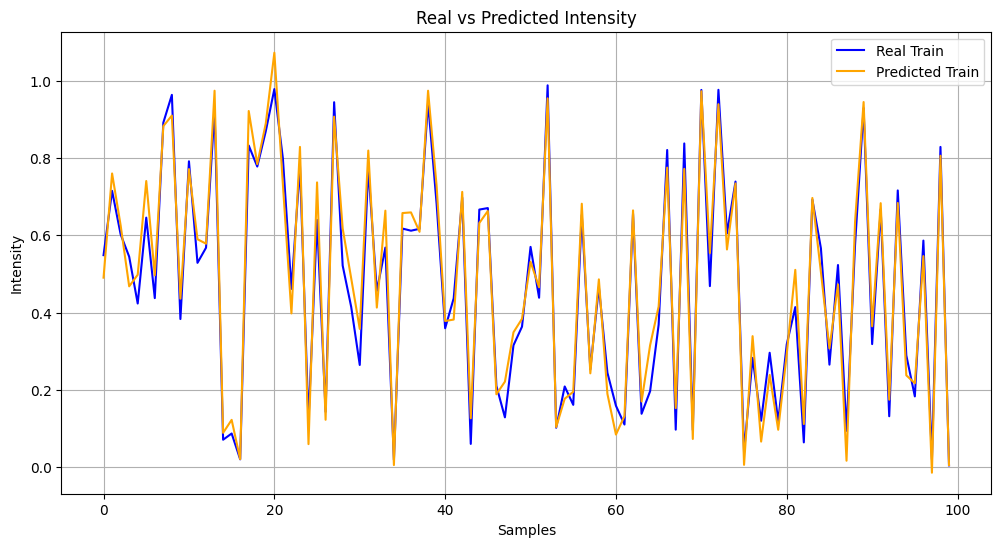

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# นี่เป็นตัวอย่างข้อมูล
np.random.seed(0)  # เพื่อให้ผลลัพธ์คงที่
train_data = pd.DataFrame({
    'Intensity': np.random.rand(100)  # ค่าจริง (Intensity)
})

# เป้าหมายจริง
Y_Train = train_data['Intensity'].values

# ค่าทำนาย (ควรเปลี่ยนเป็นค่าจริงจากโมเดลของคุณ)
Yhat_Train = Y_Train + np.random.normal(0, 0.05, size=Y_Train.shape)  # ตัวอย่างค่าทำนาย

# สร้างกราฟ
plt.figure(figsize=(12, 6))

# พลอตกราฟค่าจริง
plt.plot(Y_Train, label='Real Train', color='blue')

# พลอตกราฟค่าทำนาย
plt.plot(Yhat_Train, label='Predicted Train', color='orange')

# เพิ่มคำอธิบายกราฟ
plt.title('Real vs Predicted Intensity')
plt.xlabel('Samples')
plt.ylabel('Intensity')
plt.legend()
plt.grid()
plt.show()


In [ ]:
np.random.seed(0)  # เพื่อให้ผลลัพธ์คงที่
train_data = pd.DataFrame({
    'destruction': np.random.rand(100)  # ค่าจริง (destruction)
})

# เป้าหมายจริง
Y_Train_destruction = train_data['destruction'].values

# ค่าทำนาย (ควรเปลี่ยนเป็นค่าจริงจากโมเดลของคุณ)
Yhat_Train_destruction = Y_Train_destruction + np.random.normal(0, 0.05, size=Y_Train_destruction.shape)  # ตัวอย่างค่าทำนาย

# สร้างกราฟ
plt.figure(figsize=(12, 6))

# พลอตกราฟค่าจริง
plt.plot(Y_Train_destruction, label='Real Destruction', color='green')

# พลอตกราฟค่าทำนาย
plt.plot(Yhat_Train_destruction, label='Predicted Destruction', color='red')

# เพิ่มคำอธิบายกราฟ
plt.title('Real vs Predicted Destruction')
plt.xlabel('Samples')
plt.ylabel('Destruction')
plt.legend()
plt.grid()
plt.show()